In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [48]:
import charset_normalizer

path = './data/vitivinicultura.csv'
with open(path, 'rb') as rd:
    result = charset_normalizer.detect(rd.read(110000))
    print('encoding: ', result['encoding'])
    rd.close()
df = pd.read_csv(path, encoding=result['encoding'])
df.head()

encoding:  windows-1250


,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
0,13,Vitivinicultura,162,Mosto,Elaboración,hl,INV,Anual,Nacional,PROVINCIA,10,CATAMARCA,2002-01-01,4079.0
1,13,Vitivinicultura,162,Mosto,Elaboración,hl,INV,Anual,Nacional,PROVINCIA,10,CATAMARCA,2003-01-01,6126.0
2,13,Vitivinicultura,162,Mosto,Elaboración,hl,INV,Anual,Nacional,PROVINCIA,10,CATAMARCA,2004-01-01,17905.0
3,13,Vitivinicultura,162,Mosto,Elaboración,hl,INV,Anual,Nacional,PROVINCIA,10,CATAMARCA,2005-01-01,33147.0
4,13,Vitivinicultura,162,Mosto,Elaboración,hl,INV,Anual,Nacional,PROVINCIA,10,CATAMARCA,2006-01-01,52299.0


In [49]:
df[df['indicador'] == 'Exportaciones']

,sector_id,sector_nombre,variable_id,actividad_producto_nombre,indicador,unidad_de_medida,fuente,frecuencia_nombre,cobertura_nombre,alcance_tipo,alcance_id,alcance_nombre,indice_tiempo,valor
186,13,Vitivinicultura,163,Mosto concentrado,Exportaciones,miles de dólares,INV,Anual,Nacional,PAIS,200,Argentina,2000-01-01,53880.0
187,13,Vitivinicultura,163,Mosto concentrado,Exportaciones,miles de dólares,INV,Anual,Nacional,PAIS,200,Argentina,2001-01-01,51001.0
188,13,Vitivinicultura,163,Mosto concentrado,Exportaciones,miles de dólares,INV,Anual,Nacional,PAIS,200,Argentina,2002-01-01,50249.0
189,13,Vitivinicultura,163,Mosto concentrado,Exportaciones,miles de dólares,INV,Anual,Nacional,PAIS,200,Argentina,2003-01-01,55722.0
190,13,Vitivinicultura,163,Mosto concentrado,Exportaciones,miles de dólares,INV,Anual,Nacional,PAIS,200,Argentina,2004-01-01,73442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9070,13,Vitivinicultura,172,Vino,Exportaciones,miles de dólares,INV,Mensual,Nacional,PROVINCIA,90,TUCUMAN,2024-05-01,0.0
9071,13,Vitivinicultura,172,Vino,Exportaciones,miles de dólares,INV,Mensual,Nacional,PROVINCIA,90,TUCUMAN,2024-06-01,0.0
9072,13,Vitivinicultura,172,Vino,Exportaciones,miles de dólares,INV,Mensual,Nacional,PROVINCIA,90,TUCUMAN,2024-07-01,0.0
9073,13,Vitivinicultura,172,Vino,Exportaciones,miles de dólares,INV,Mensual,Nacional,PROVINCIA,90,TUCUMAN,2024-08-01,0.0


In [50]:
print(df.shape)
df.describe()

(26023, 14)


,sector_id,variable_id,alcance_id,valor
count,26023.0,26023.000000,26023.000000,2.601600e+04
mean,13.0,176.027053,52.067709,3.348439e+05
std,0.0,4.851586,36.250114,1.685214e+06
min,13.0,162.000000,6.000000,-1.103774e+05
25%,13.0,172.000000,30.000000,1.900000e+01
50%,13.0,175.000000,50.000000,1.098820e+03
75%,13.0,180.000000,66.000000,2.065904e+04
max,13.0,184.000000,200.000000,2.043435e+07


In [51]:
df.isnull().sum()

sector_id                    0
sector_nombre                0
variable_id                  0
actividad_producto_nombre    0
indicador                    0
unidad_de_medida             0
fuente                       0
frecuencia_nombre            0
cobertura_nombre             0
alcance_tipo                 0
alcance_id                   0
alcance_nombre               0
indice_tiempo                0
valor                        7
dtype: int64

In [52]:
df = df.dropna()
df['fecha'] = pd.to_datetime(df['indice_tiempo'], format='%Y-%m-%d')

In [53]:
df.sector_nombre.unique(), df.sector_id.unique(), df.actividad_producto_nombre.unique(), df.indicador.unique()

(array(['Vitivinicultura'], dtype=object),
 array([13], dtype=int64),
 array(['Mosto', 'Mosto concentrado', 'Uva_para vinificar', 'Uva_total',
        'Vino', 'Vino blanco escurrido', 'Vino malbec (sin certificar)',
        'Vinos tintos', 'Vinos varietales', 'Vinos_sin mención varietal',
        'Vinos_total', 'Vinos_varietal', 'Vinos_varietal a certificar',
        'Vińedos'], dtype=object),
 array(['Elaboración', 'Exportaciones', 'Producción',
        'Producción según ingreso a establecimientos',
        'Producción según provincia de origen', 'Mercado interno',
        'Precio interno_de traslado contado sin IVA Mendoza',
        'Certificación', 'Existencias', 'Cantidad', 'Superficie'],
       dtype=object))

In [54]:
d = ['Elaboración', 'Exportaciones', 'Producción', 'Mercado interno']
for i in d:
    print(df[df['indicador'] == i].shape)
    print(df[df['indicador'] == i]['frecuencia_nombre'].unique())
    print(df[df['indicador'] == i]['cobertura_nombre'].unique())
    print(df[df['indicador'] == i]['alcance_tipo'].unique())
    print(df[df['indicador'] == i]['unidad_de_medida'].unique())
    print('----------')

(543, 15)
['Anual']
['Nacional']
['PROVINCIA']
['hl']
----------
(7183, 15)
['Anual' 'Mensual']
['Nacional']
['PAIS' 'PROVINCIA']
['miles de dólares' 'tn' 'hl']
----------
(27, 15)
['Anual']
['Nacional']
['PAIS']
['tn']
----------
(3878, 15)
['Anual' 'Mensual']
['Nacional']
['PROVINCIA']
['hl']
----------


In [55]:
df_elab = df[df['indicador'] == 'Elaboración']
df_exp_md = df[(df['indicador'] == 'Exportaciones') & (df['frecuencia_nombre'] == 'Mensual') & (df['unidad_de_medida']=='miles de dólares')]
df_exp_hl = df[(df['indicador'] == 'Exportaciones') & (df['frecuencia_nombre'] == 'Mensual') & (df['unidad_de_medida']=='hl')]
df_prod = df[df['indicador'] == 'Producción']
df_int = df[(df['indicador'] == 'Mercado interno') & (df['frecuencia_nombre'] == 'Mensual')]

In [56]:
mean_exp_per_month = df_exp_md.groupby(df_exp_md['fecha'].dt.month)['valor'].mean()
mean_exp_per_month.index = mean_exp_per_month.index.map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})
mean_exp_per_month

fecha
Enero         3570.324053
Febrero       3492.008472
Marzo         4122.042625
Abril         4201.337276
Mayo          4359.067176
Junio         4094.687940
Julio         4406.138771
Agosto        4829.959269
Septiembre    4654.702824
Octubre       4914.377579
Noviembre     4257.988877
Diciembre     4049.363099
Name: valor, dtype: float64

C:\Users\nico\AppData\Local\Temp\ipykernel_6016\1432197907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=mean_exp_per_month, x=mean_exp_per_month.index, ax=ax, palette='pastel')


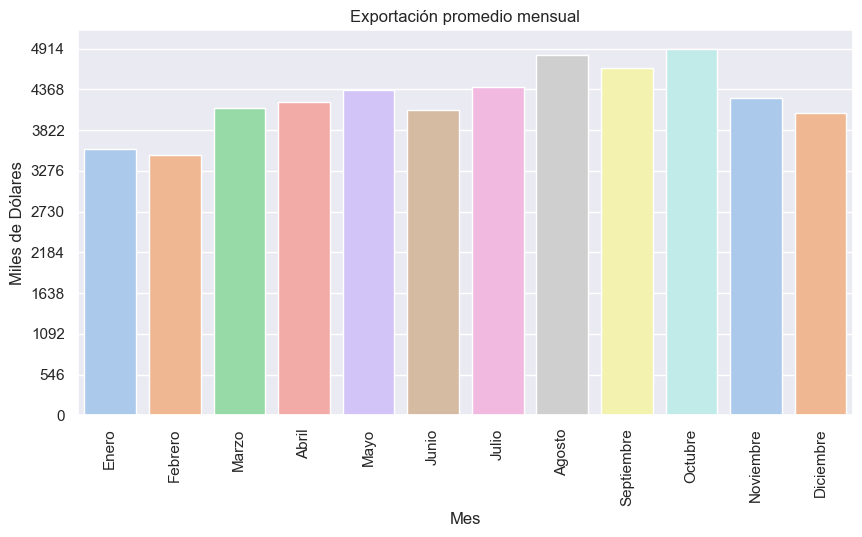

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=mean_exp_per_month, x=mean_exp_per_month.index, ax=ax, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Mes')
plt.yticks(np.linspace(0,mean_exp_per_month.max(), 10))
plt.ylabel('Miles de Dólares')
plt.title('Exportación promedio mensual')
plt.show()
# for i in range(len(mean_exp_per_month)):
#     ax.text(mean_exp_per_month.index[i], mean_exp_per_month[i], mean_exp_per_month[i], ha='center', va='bottom', color='black')

In [97]:
df_exp_md_mend_sanjuan = df_exp_md[(df_exp_md['alcance_nombre'] =='MENDOZA') | (df_exp_md['alcance_nombre']=='SAN JUAN')]
df_exp_md_others = df_exp_md.drop(df_exp_md_mend_sanjuan.index)
df_exp_md_lst = [df_exp_md_mend_sanjuan, df_exp_md_others]

In [98]:
df_exp_md_mend_sanjuan.groupby([df_exp_md_mend_sanjuan.fecha.dt.year, df_exp_md_mend_sanjuan.alcance_nombre])['valor'].mean()

fecha  alcance_nombre
2001   MENDOZA           11331.583333
       SAN JUAN            354.000000
2002   MENDOZA            9724.083333
       SAN JUAN            386.333333
2003   MENDOZA           12748.000000
       SAN JUAN            750.666667
2004   MENDOZA           17687.583333
       SAN JUAN            626.666667
2005   MENDOZA           22581.083333
       SAN JUAN           1109.333333
2006   MENDOZA           28401.500000
       SAN JUAN           1817.500000
2007   MENDOZA           35206.750000
       SAN JUAN           2723.583333
2008   MENDOZA           44832.833333
       SAN JUAN           3237.083333
2009   MENDOZA           46579.750000
       SAN JUAN           2770.333333
2010   MENDOZA           54867.250000
       SAN JUAN           2902.833333
2011   MENDOZA           61082.000000
       SAN JUAN           4164.000000
2012   MENDOZA           67907.333333
       SAN JUAN           4297.250000
2013   MENDOZA           64341.750000
       SAN JUAN           44

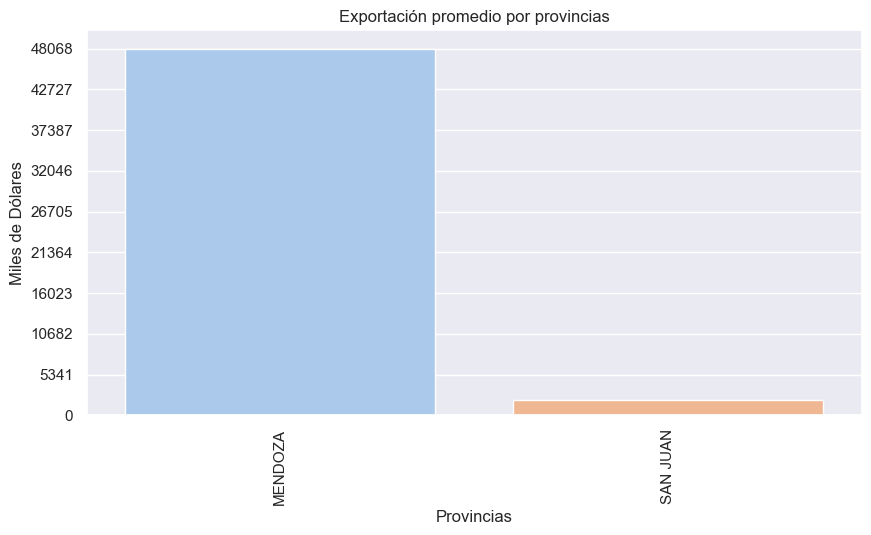

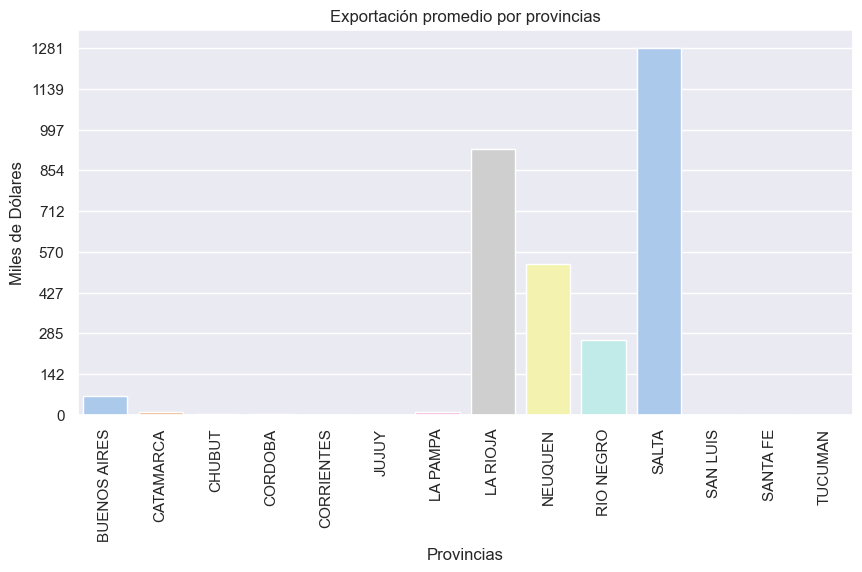

In [105]:
for i in range(len(df_exp_md_lst)):
    mean_exp_per_province = df_exp_md_lst[i].groupby('alcance_nombre')['valor'].mean()
    fig, ax = plt.subplots(figsize=(10,5))
    provs = mean_exp_per_province.index
    sns.barplot(y=mean_exp_per_province, x=provs, ax=ax, hue=provs, palette='pastel')
    plt.xticks(rotation=90)
    plt.xlabel('Provincias')
    plt.yticks(np.linspace(0,mean_exp_per_province.max(),10))
    plt.ylabel('Miles de Dólares')
    plt.title('Exportación promedio por provincias')
    plt.show()

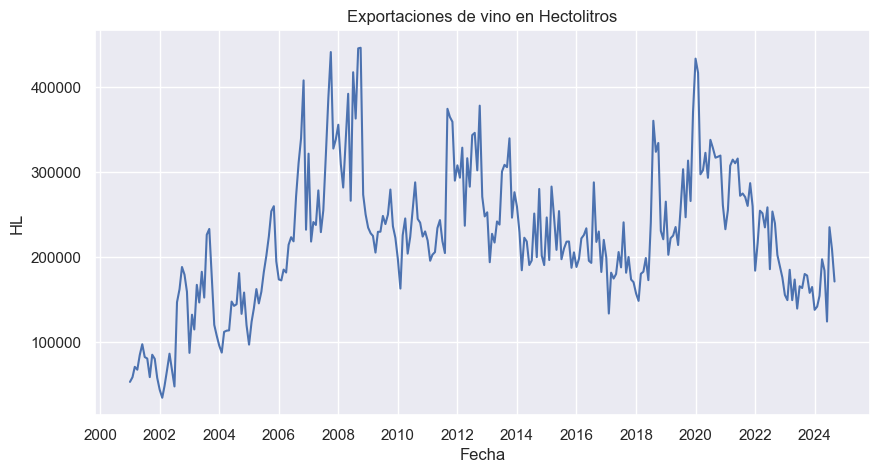

In [133]:
import matplotlib.dates as mdates 
exportaciones_hl = df_exp_hl.groupby('fecha')['valor'].sum()
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=exportaciones_hl.index, y=exportaciones_hl, ax=ax)
locator = mdates.YearLocator(2)  # Marca cada 1 año. Cambia a MonthLocator o DayLocator si lo necesitas.
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel('Fecha')
plt.ylabel('HL')
plt.title('Exportaciones de vino en Hectolitros')
plt.show()


In [ ]:
importantes = ['fecha', 'valor', 'unidad_de_medida', 'alcance_nombre']
sample = df_exp_md[importantes].merge(df_exp_hl[importantes], on='fecha', how='inner')
sample[(sample['valor_x'] > 0) & (sample['valor_y'] > 0)]

,fecha,valor_x,unidad_de_medida_x,alcance_nombre_x,valor_y,unidad_de_medida_y,alcance_nombre_y
54,2003-07-01,12.0,miles de dólares,BUENOS AIRES,50.40,hl,BUENOS AIRES
57,2003-07-01,12.0,miles de dólares,BUENOS AIRES,1591.95,hl,LA RIOJA
58,2003-07-01,12.0,miles de dólares,BUENOS AIRES,146623.00,hl,MENDOZA
59,2003-07-01,12.0,miles de dólares,BUENOS AIRES,22.50,hl,RIO NEGRO
60,2003-07-01,12.0,miles de dólares,BUENOS AIRES,592.20,hl,SALTA
...,...,...,...,...,...,...,...
46928,2024-04-01,7.0,miles de dólares,TUCUMAN,1868.00,hl,NEUQUEN
46929,2024-04-01,7.0,miles de dólares,TUCUMAN,357.00,hl,RIO NEGRO
46930,2024-04-01,7.0,miles de dólares,TUCUMAN,3294.00,hl,SALTA
46931,2024-04-01,7.0,miles de dólares,TUCUMAN,4392.00,hl,SAN JUAN


In [ ]:
df_elab_provs = df_elab[(df_elab['alcance_nombre'] != 'MENDOZA') & (df_elab['alcance_nombre'] !='SAN JUAN')]
df_elab_provs = df_elab_provs[df_elab_provs['alcance_nombre']!='INDETERMINADA']
df_elab_provs_mosto = df_elab_provs[df_elab_provs['actividad_producto_nombre']=='Mosto']
df_elab_provs_vino = df_elab_provs[df_elab_provs['actividad_producto_nombre']=='Vino']


df_elab_mendoza_sanjuan = df_elab.drop(df_elab_provs.index)
df_elab_mendoza_sanjuan_mosto = df_elab_mendoza_sanjuan[df_elab_mendoza_sanjuan['actividad_producto_nombre']=='Mosto']
df_elab_mendoza_sanjuan_vino = df_elab_mendoza_sanjuan[df_elab_mendoza_sanjuan['actividad_producto_nombre']=='Vino']

elab_dfs = [df_elab_provs_mosto, df_elab_provs_vino, df_elab_mendoza_sanjuan_mosto, df_elab_mendoza_sanjuan_vino]

In [ ]:
10 ** (len(str(df_elab_provs_vino['valor'].max()))-3) /2

50000.0

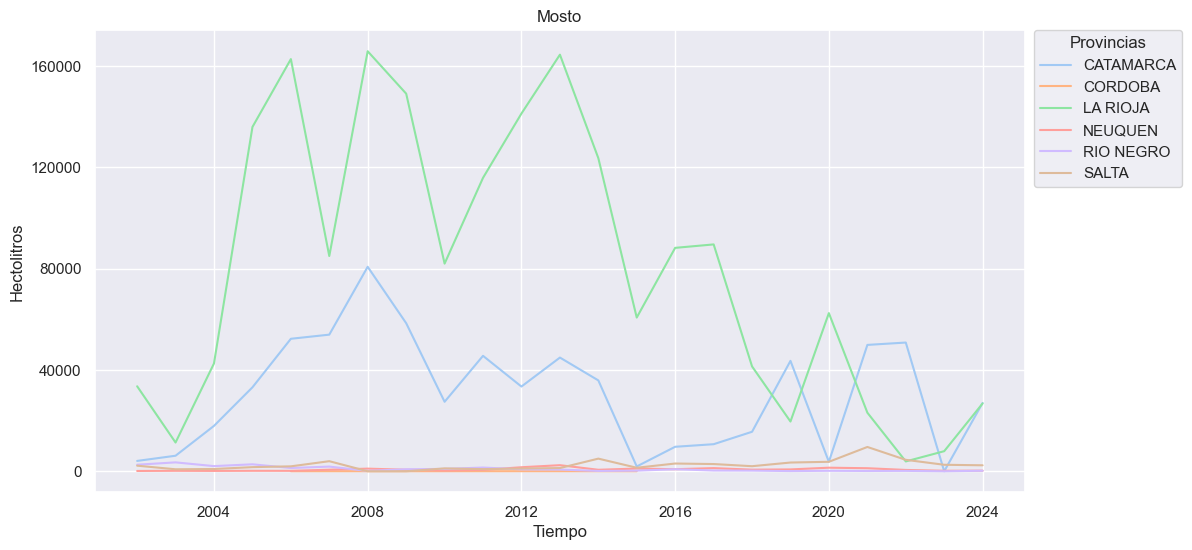

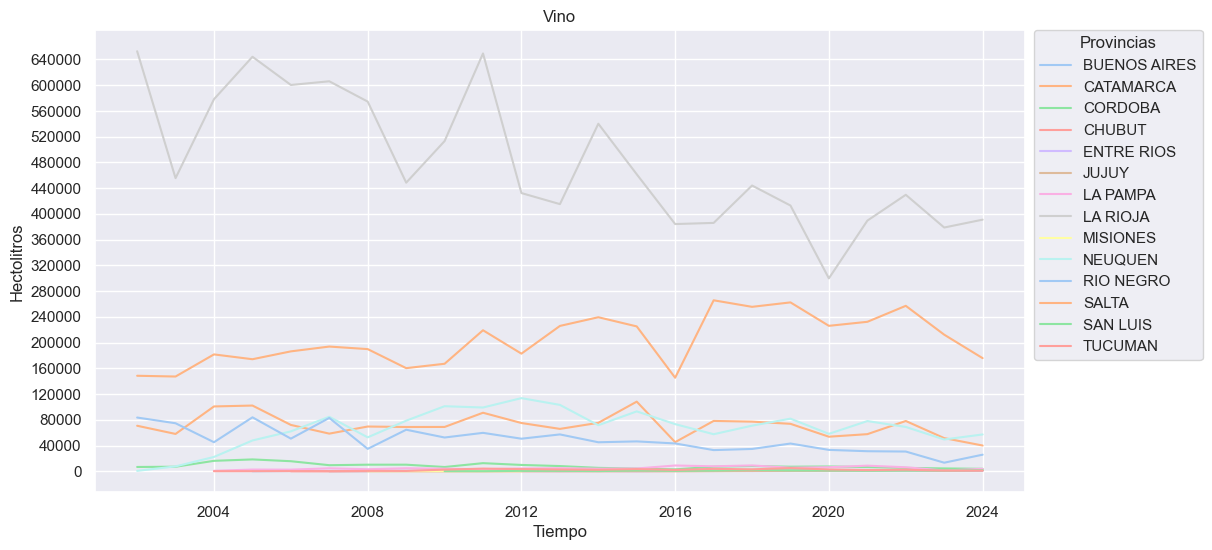

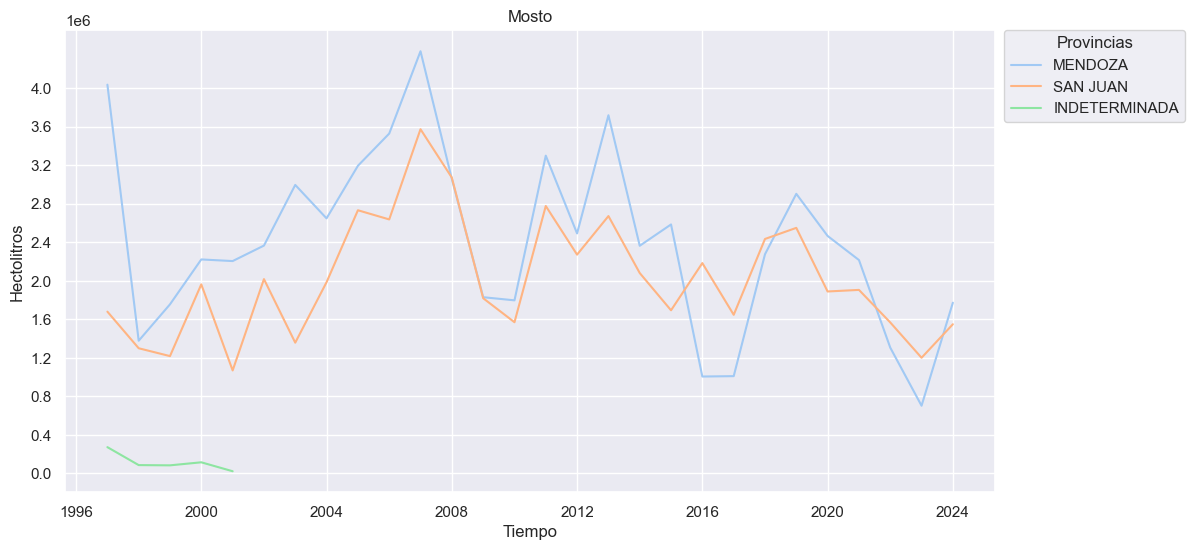

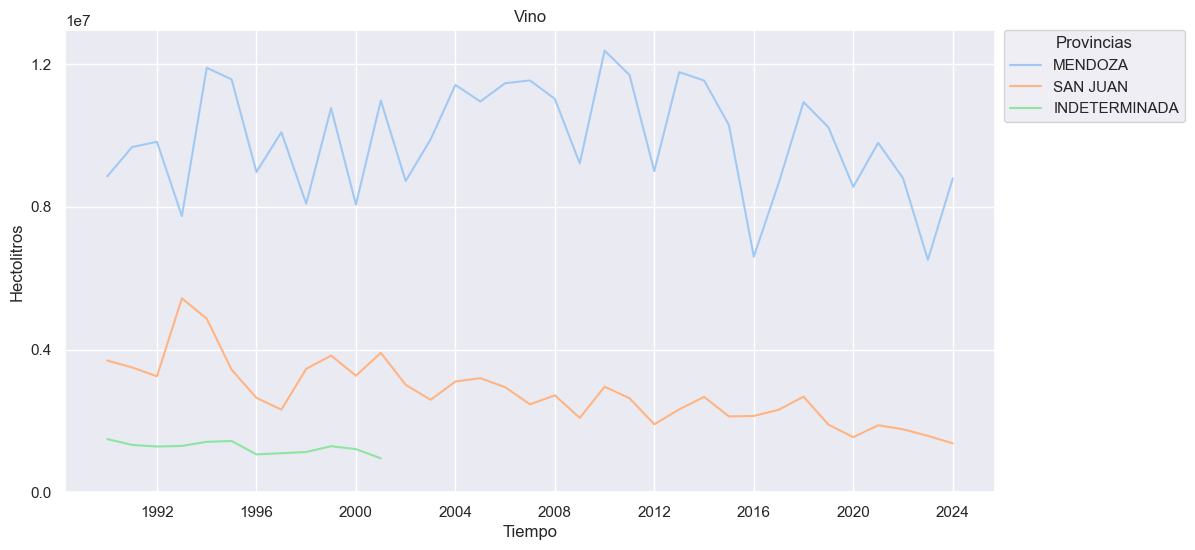

In [ ]:
for i in range(len(elab_dfs)):
    max_val = elab_dfs[i]['valor'].max()
    fig, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(x='fecha', y='valor', hue='alcance_nombre', data=elab_dfs[i], ax=ax, palette='pastel')
    plt.xlabel('Tiempo')
    plt.yticks(np.arange(0,max_val, 10 ** (len(str(max_val)) -3) / 2.5 ))
    plt.ylabel('Hectolitros')
    plt.title(elab_dfs[i]['actividad_producto_nombre'].iloc[0])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title='Provincias')
    plt.show()